In [4]:

# List of x and y coordinates
pt = []

# Calculate Dist. of point from line ay+bx+c=0 form
def calc_dist(a,b,c,x,y):
    p = (a*y) + (b*x) + c
    q = (a*a)+(b*b)
    q = np.sqrt(q)
    return abs(p/q)


# Divide DataSet and calculate e1/e2
def calc_error_ratio(size,k,m,c,pt):
    brk = size*k
    error = 0
    for i in range(brk):
        offset = calc_dist(1,m,c,pt[i][0],pt[i][1])
        error = error + offset
    e1 = error/brk
    error = 0
    for i in range(brk+1, size):
        offset = calc_dist(1,m,c,pt[i][0],pt[i][1])
        error = error + offset
    e2 = error/(size-brk)
    return e1/e2

# Calculate Slope
def calc_slope(m,c,size,ratio,unit):
    d_prv = 1-calc_error_ratio(size,ratio,m,c)
    while(d>0.001):
        m=m+unit
        d=1-calc_error_ratio(size,ratio,m,c)
        if(d>d_prv):
            # Terminate Looping and return previous value of m, Found best value of slope
            m_act = m - unit
            break;
        else:
            # Find other instance of m for a better suit
            d_prv = d
    
    return m_act,d

# Calculate Intercept
def calc_intercept(m,c,size,ratio,unit):
    d_prv = 1-calc_error_ratio(size,ratio,m,c)
    while(d>0.001):
        c=c+unit
        d=1-calc_error_ratio(size,ratio,m,c)
        if(d>d_prv):
            # Terminate Looping and return previous value of c, Found best value of intercept
            c_act = c - unit
            break;
        else:
            # Find other instance of c for a better suit
            d_prv = d
    
    return c_act,d


# Finding direction of movement for m
unit = 0.001
error_z,error_n,error_p = 0,0,0
m=0
for i in range(size):
        offset = calc_dist(1,m,c,pt[i][0],pt[i][1])
        error_z = error_z + offset
m=m+unit
for i in range(size):
        offset = calc_dist(1,m,c,pt[i][0],pt[i][1])
        error_p = error_p + offset

m=0
m=m-unit
for i in range(size):
        offset = calc_dist(1,m,c,pt[i][0],pt[i][1])
        error_n = error_n + offset
        
p = abs(error_z - error_p)
n = abs(error_z - error_n)
if(p>n):
    unit=-0.001
m=0    

# m_act = calc_slope(m,c,size,ratio,unit)


# Finding direction of movement for m
unit = 0.001
error_z,error_n,error_p = 0,0,0
c=0
for i in range(size):
        offset = calc_dist(1,m_act,c,pt[i][0],pt[i][1])
        error_z = error_z + offset
c=c+unit
for i in range(size):
        offset = calc_dist(1,m_act,c,pt[i][0],pt[i][1])
        error_p = error_p + offset

c=0
c=c-unit
for i in range(size):
        offset = calc_dist(1,m_act,c,pt[i][0],pt[i][1])
        error_n = error_n + offset
        
p = abs(error_z - error_p)
n = abs(error_z - error_n)
if(p>n):
    unit=-0.001
c=0 

# calc_intercept(m_act,c,size,ratio,unit)

# Implementation

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [35]:
data = pd.read_csv('housing.csv')
data.head(10)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [16]:
data.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


In [44]:
x = data[['RM','LSTAT','PTRATIO']]
y = data[['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
X_train.shape[0]

342

In [42]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

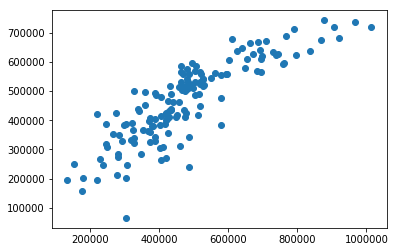

In [78]:
predictions = lm.predict(X_test) #has all the predicted price
plt.scatter(y_test, predictions)

In [ ]:
a = np.float32(input("Enter RM"))
b = np.float32(input("Enter LSTAT"))
c = np.float32(input("Enter PTRATIO"))
data = [[a,b,c]]
print("Price is : {}".format(lm.predict(data)))